In [67]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import os
from sklearn import metrics
import seaborn as seabornInstance 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# load dataset
from keras import models    
from keras.models import load_model
from sklearn import datasets, linear_model, metrics 
from sklearn.linear_model import LinearRegression
import pandas as pd
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from random import randrange, uniform
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [68]:
os.chdir("/Users/chandan/desktop/eduWork_project/third_project")

In [69]:
ls

day.csv


In [349]:
data = pd.read_csv('day.csv')

In [350]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Analyzing the data present


In [12]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [346]:
data = pd.DataFrame(data)

In [72]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


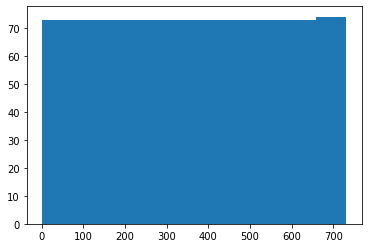

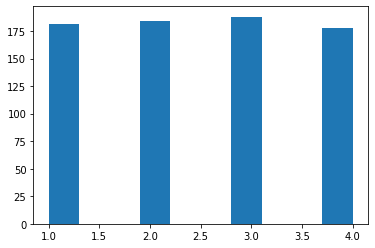

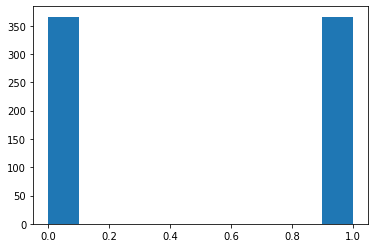

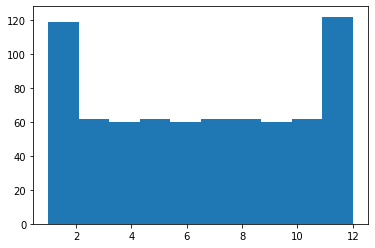

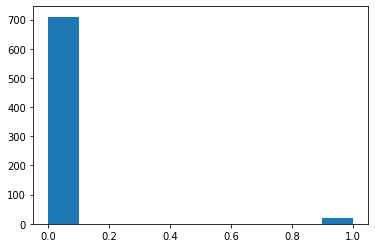

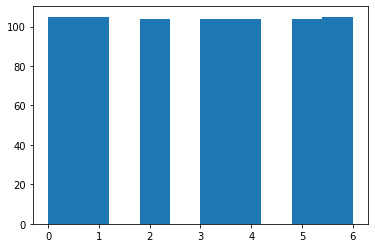

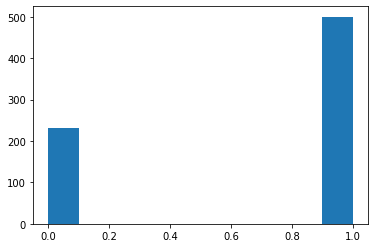

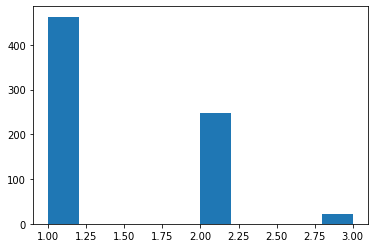

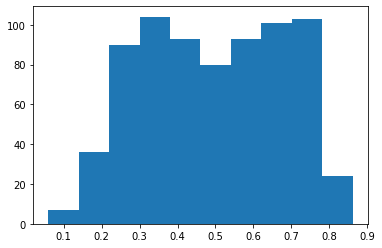

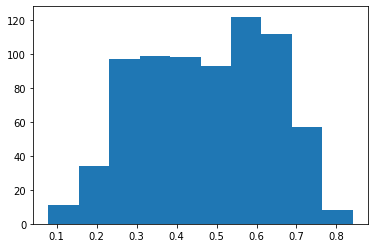

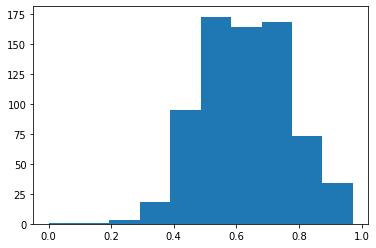

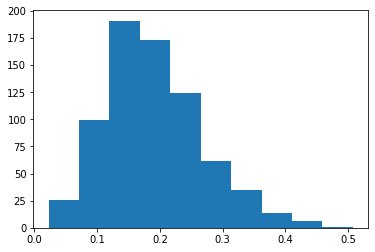

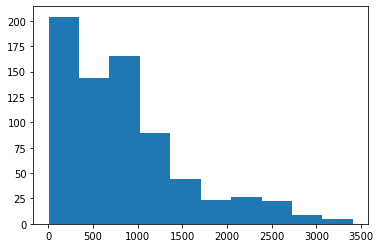

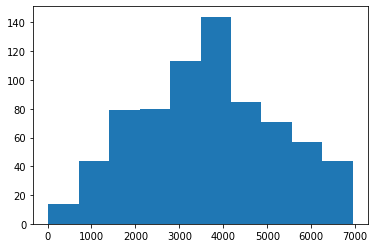

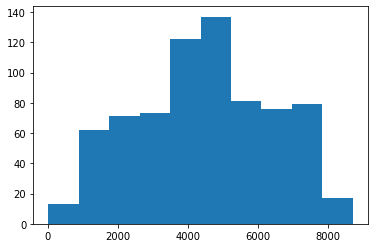

In [424]:
for i in data:
    plt.figure()
    plt.hist(data[i])
#type(data['yr'])

Lets the null values present and we need to add the median and the mean in the same

In [17]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [347]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4027ba20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a402880f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4027b710>],
 'medians': [<matplotlib.lines.Line2D at 0x1a40288780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a40288ac8>],
 'means': []}

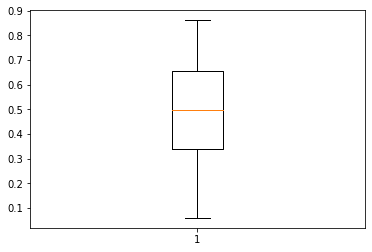

In [353]:
plt.boxplot(data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4451f390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4451fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4451f240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4452b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4452b4a8>],
 'means': []}

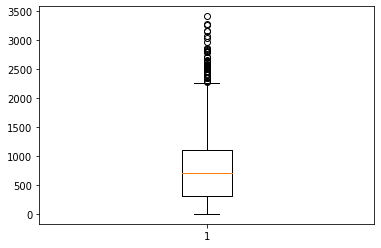

In [351]:
plt.boxplot(data['casual'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4035f4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4035fbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4035f390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a403682b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a403685f8>],
 'means': []}

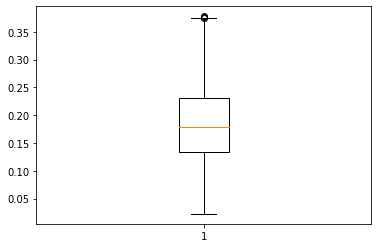

In [354]:
plt.boxplot(data1['windspeed'])

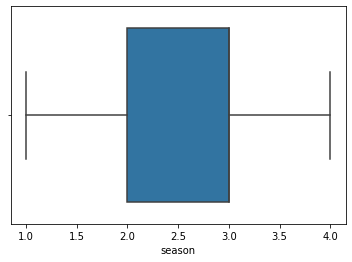

In [355]:
sns.boxplot(x = data['season'])

In [86]:
data.drop("dteday",axis = 1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1796


In [91]:
data = data.drop("dteday",axis = 1)

In [92]:
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [93]:
data = data.drop("instant",axis = 1)

In [94]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


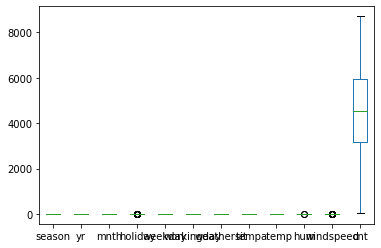

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

data.plot(kind = 'box')

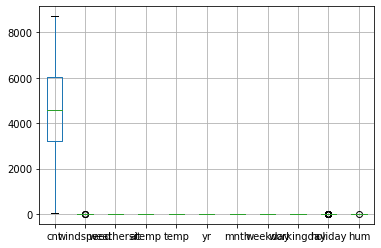

In [293]:
boxplot = data1.boxplot(column=['cnt', 'windspeed', 'weathersit','atemp','temp','yr','mnth','weekday','workingday','holiday','hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a30f02048>,
 'caps': [<matplotlib.lines.Line2D at 0x1a30f02748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a30efaeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a30f02dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a30f0d160>],
 'means': []}

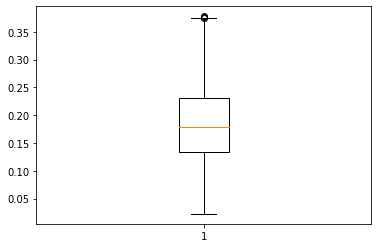

In [298]:
plt.boxplot(data1['windspeed'])

AxesSubplot(0.125,0.125;0.775x0.755)


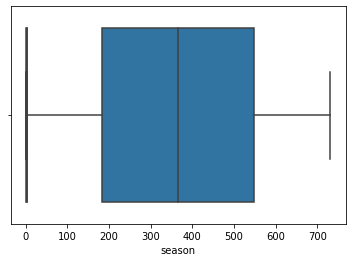

In [32]:
sns.boxplot(x  = data['instant'])


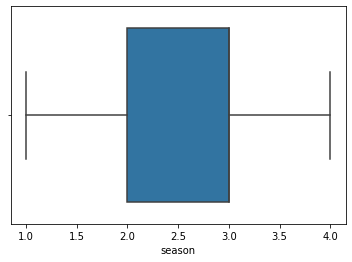

{'whiskers': [<matplotlib.lines.Line2D at 0x1a48317358>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4810abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a48317240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4810a4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4810ae10>],
 'means': []}

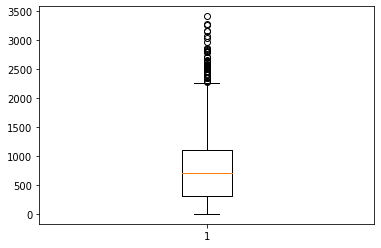

In [377]:
plt.boxplot(data['casual'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a446e7390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a446e7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a446e7240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a446f2160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a446f24a8>],
 'means': []}

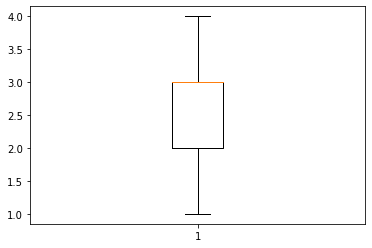

In [356]:
plt.boxplot(data['season'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3ac27898>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3ac27f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3ac27748>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3ac30668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3ac309b0>],
 'means': []}

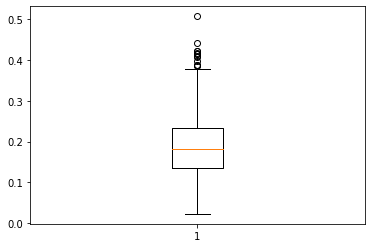

In [259]:
plt.boxplot(data['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a40c06cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40c15400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a40c06b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a40c15a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a40c15dd8>],
 'means': []}

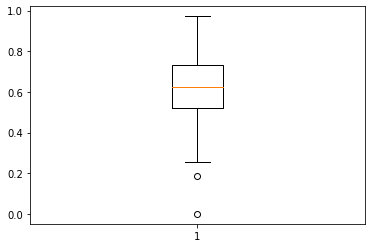

In [323]:
plt.boxplot(data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a440fda58>,
 'caps': [<matplotlib.lines.Line2D at 0x1a440a4748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a440fd908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a440a4278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a440a45f8>],
 'means': []}

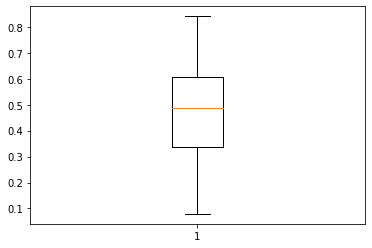

In [329]:
plt.boxplot(data['atemp'])

deleting the values not present in the numeric form


In [361]:
data = data.drop(['dteday'],axis = 1)

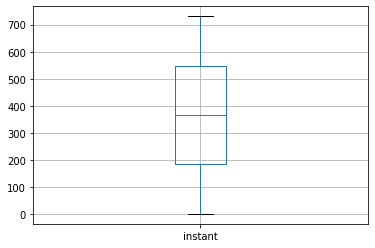

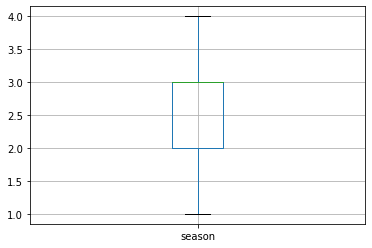

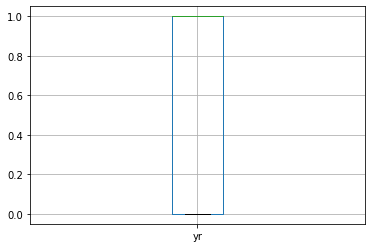

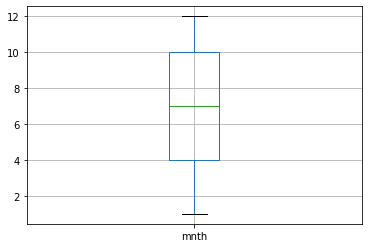

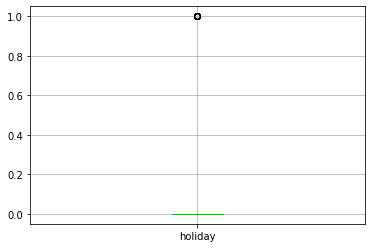

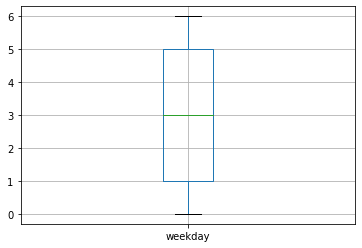

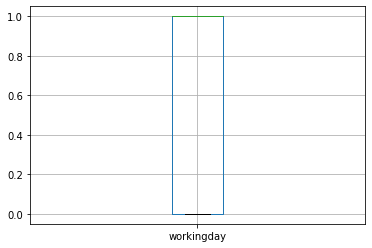

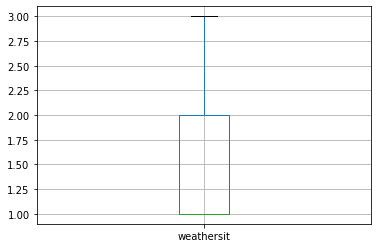

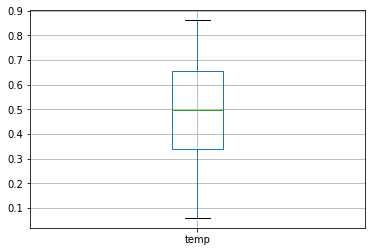

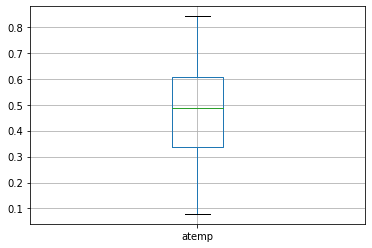

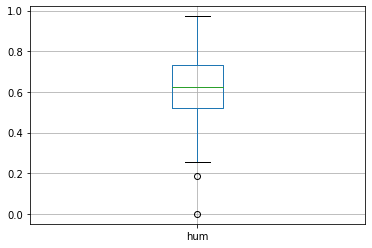

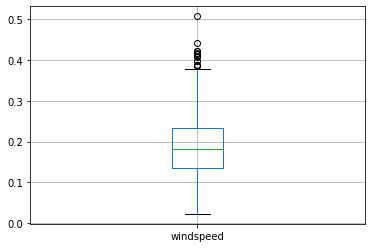

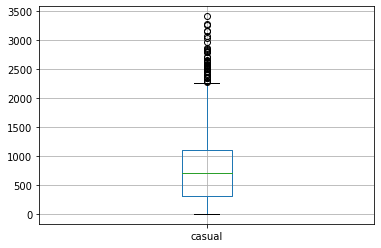

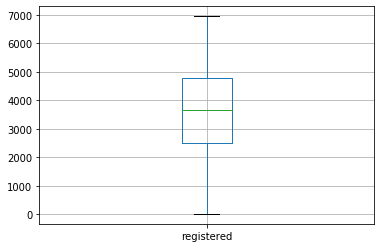

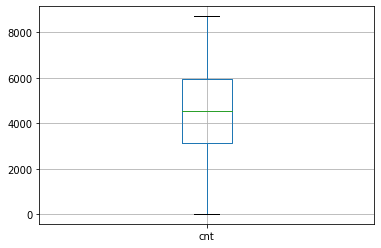

In [362]:
import matplotlib.pyplot as plt

for column in data:
    plt.figure()
    data.boxplot([column])

In [365]:
data1 = data
data1

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [441]:
#Handling the outliers



#for hum variable
q75, q25 = np.percentile(data.loc[:,'casual'],[75,25])
    
print(q25)
print(q75)

iqr = q75 - q25

print(iqr)

#using formulaes to get min and max range 
min = q25 - (iqr * 1.5)
max = q75 + (iqr * 1.5)

print(min)
print(max)

315.5
1096.0
780.5
-855.25
2266.75


In [443]:
data = data.drop(data1[data.loc[:,'casual'] < min].index)
data = data.drop(data1[data.loc[:,'casual'] > max].index)

/Users/chandan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/chandan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'whiskers': [<matplotlib.lines.Line2D at 0x1a57a20518>,
 'caps': [<matplotlib.lines.Line2D at 0x1a57a20c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a57a203c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a57a2a2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a57a2a630>],
 'means': []}

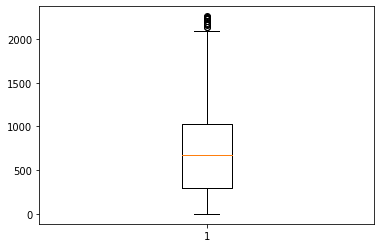

In [445]:
plt.boxplot(data['casual'])

In [ ]:
data1 = data1.drop(['casual'],axis = 1)

In [388]:
data1 = data1.drop(['registered'], axis = 1)

CLEARING THE OUTLIERS

In [389]:
#Handling the outliers



#for hum variable
q75, q25 = np.percentile(data1.loc[:,'windspeed'],[75,25])
    
print(q25)
print(q75)

iqr = q75 - q25

print(iqr)

#using formulaes to get min and max range 
min = q25 - (iqr * 1.5)
max = q75 + (iqr * 1.5)

print(min)
print(max)


0.134329
0.230721
0.096392
-0.01025899999999999
0.375309


In [390]:
data1 = data1.drop(data1[data1.loc[:,'windspeed'] < min].index)
data1 = data1.drop(data1[data1.loc[:,'windspeed'] > max].index)

In [391]:
data1['windspeed']

0      0.160446
1      0.248539
2      0.248309
3      0.160296
4      0.186900
         ...   
726    0.350133
727    0.155471
728    0.124383
729    0.350754
730    0.154846
Name: windspeed, Length: 714, dtype: float64

In [392]:
#Handling the outliers



#for hum variable
q75, q25 = np.percentile(data1.loc[:,'hum'],[75,25])
    
print(q25)
print(q75)

iqr = q75 - q25

print(iqr)

#using formulaes to get min and max range 
min = q25 - (iqr * 1.5)
max = q75 + (iqr * 1.5)

print(min)
print(max)

0.5255795000000001
0.73281275
0.20723324999999992
0.2147296250000002
1.0436626249999998


In [440]:
data1 = data1.drop(data1[data1.loc[:,'hum'] < min].index)
data1 = data1.drop(data1[data1.loc[:,'hum'] > max].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a57692cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a576a1438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a57692ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a576a1ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a576a1e10>],
 'means': []}

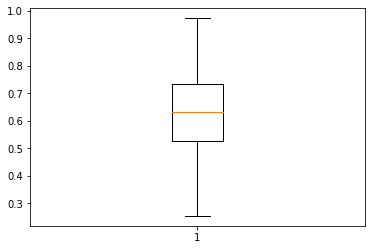

In [425]:
plt.boxplot(data1['hum'])

()

# FEATURE SELECTION


In [394]:
value = data[data1.columns[1:]].corr()['cnt'][:]

value.sort_values(ascending = False)

cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [24]:

#type(data['cnt'])


pandas.core.series.Series

VISUALIZING  THE CORRELATED VALUES

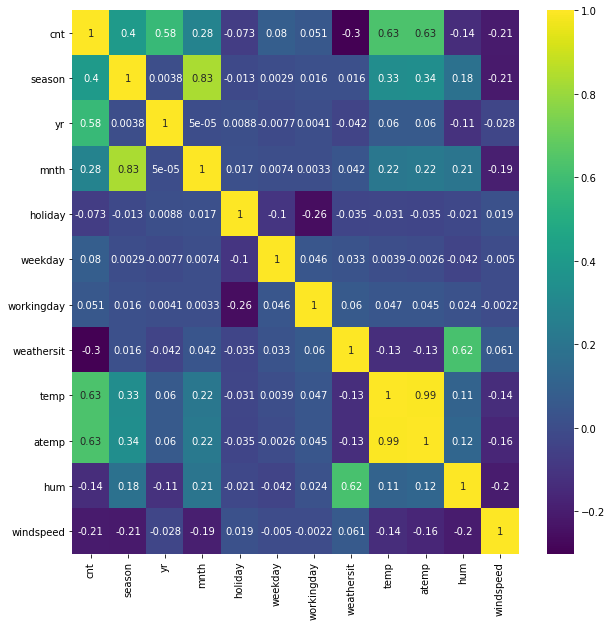

In [447]:
#Correlation matrix to find out the values that are the most correlated
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot = True,cmap = 'viridis')
plt.show()

CHECKING THE VALUES AND THE FORMS TO CHECK IF ANY ERROR IS MISSED

In [202]:
data1.describe()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


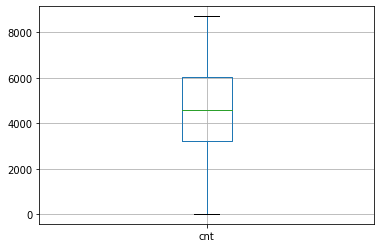

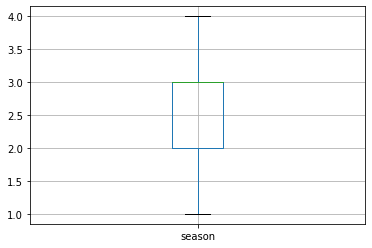

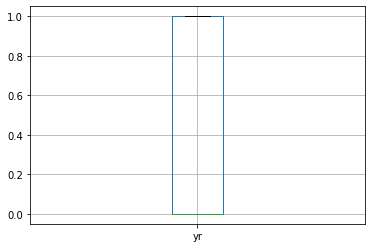

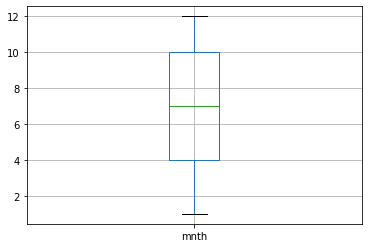

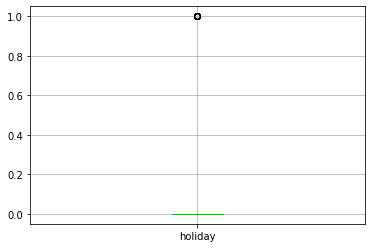

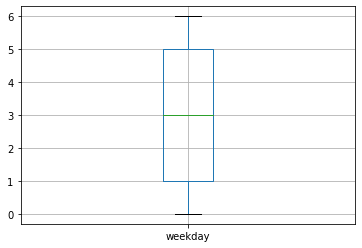

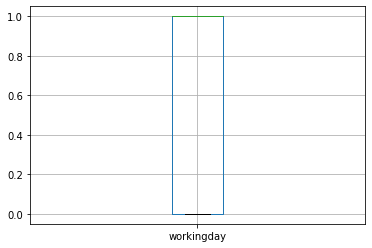

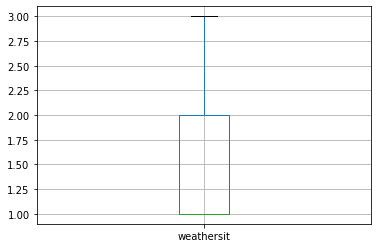

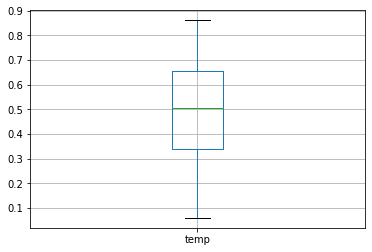

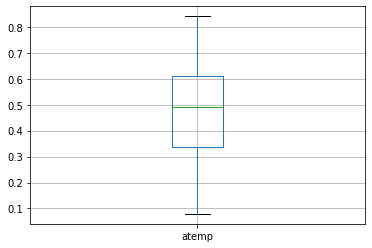

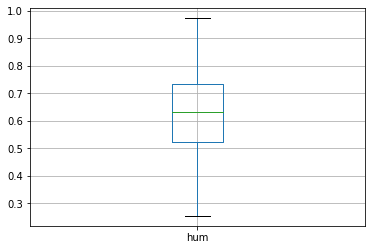

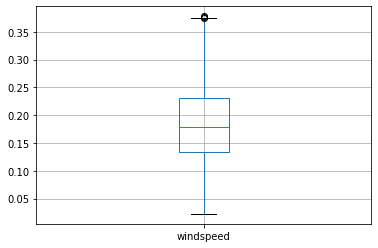

In [326]:
import matplotlib.pyplot as plt

for column in data1:
    plt.figure()
    data1.boxplot([column])

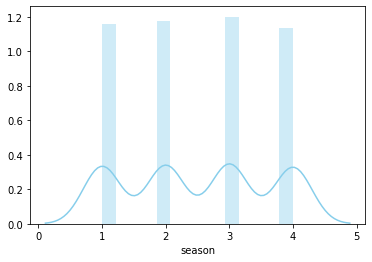

In [210]:
sns.distplot( data1['season'] , color="skyblue")


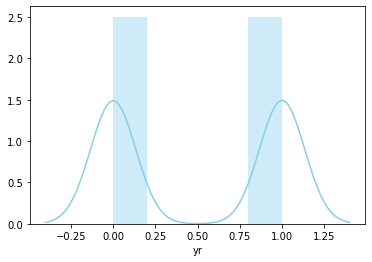

In [209]:
sns.distplot( data1['yr'] , color="skyblue")


In [ ]:
for i in data1

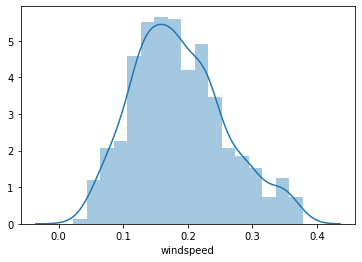

In [320]:
sns.distplot(data1['windspeed'])

In [270]:
data1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

FEATURE SCALING

In [396]:
column_index = ['cnt','season','yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
data1 = data1.reindex(columns = column_index)

In [397]:
data1

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,801,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1349,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1562,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1600,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,3095,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1341,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1796,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


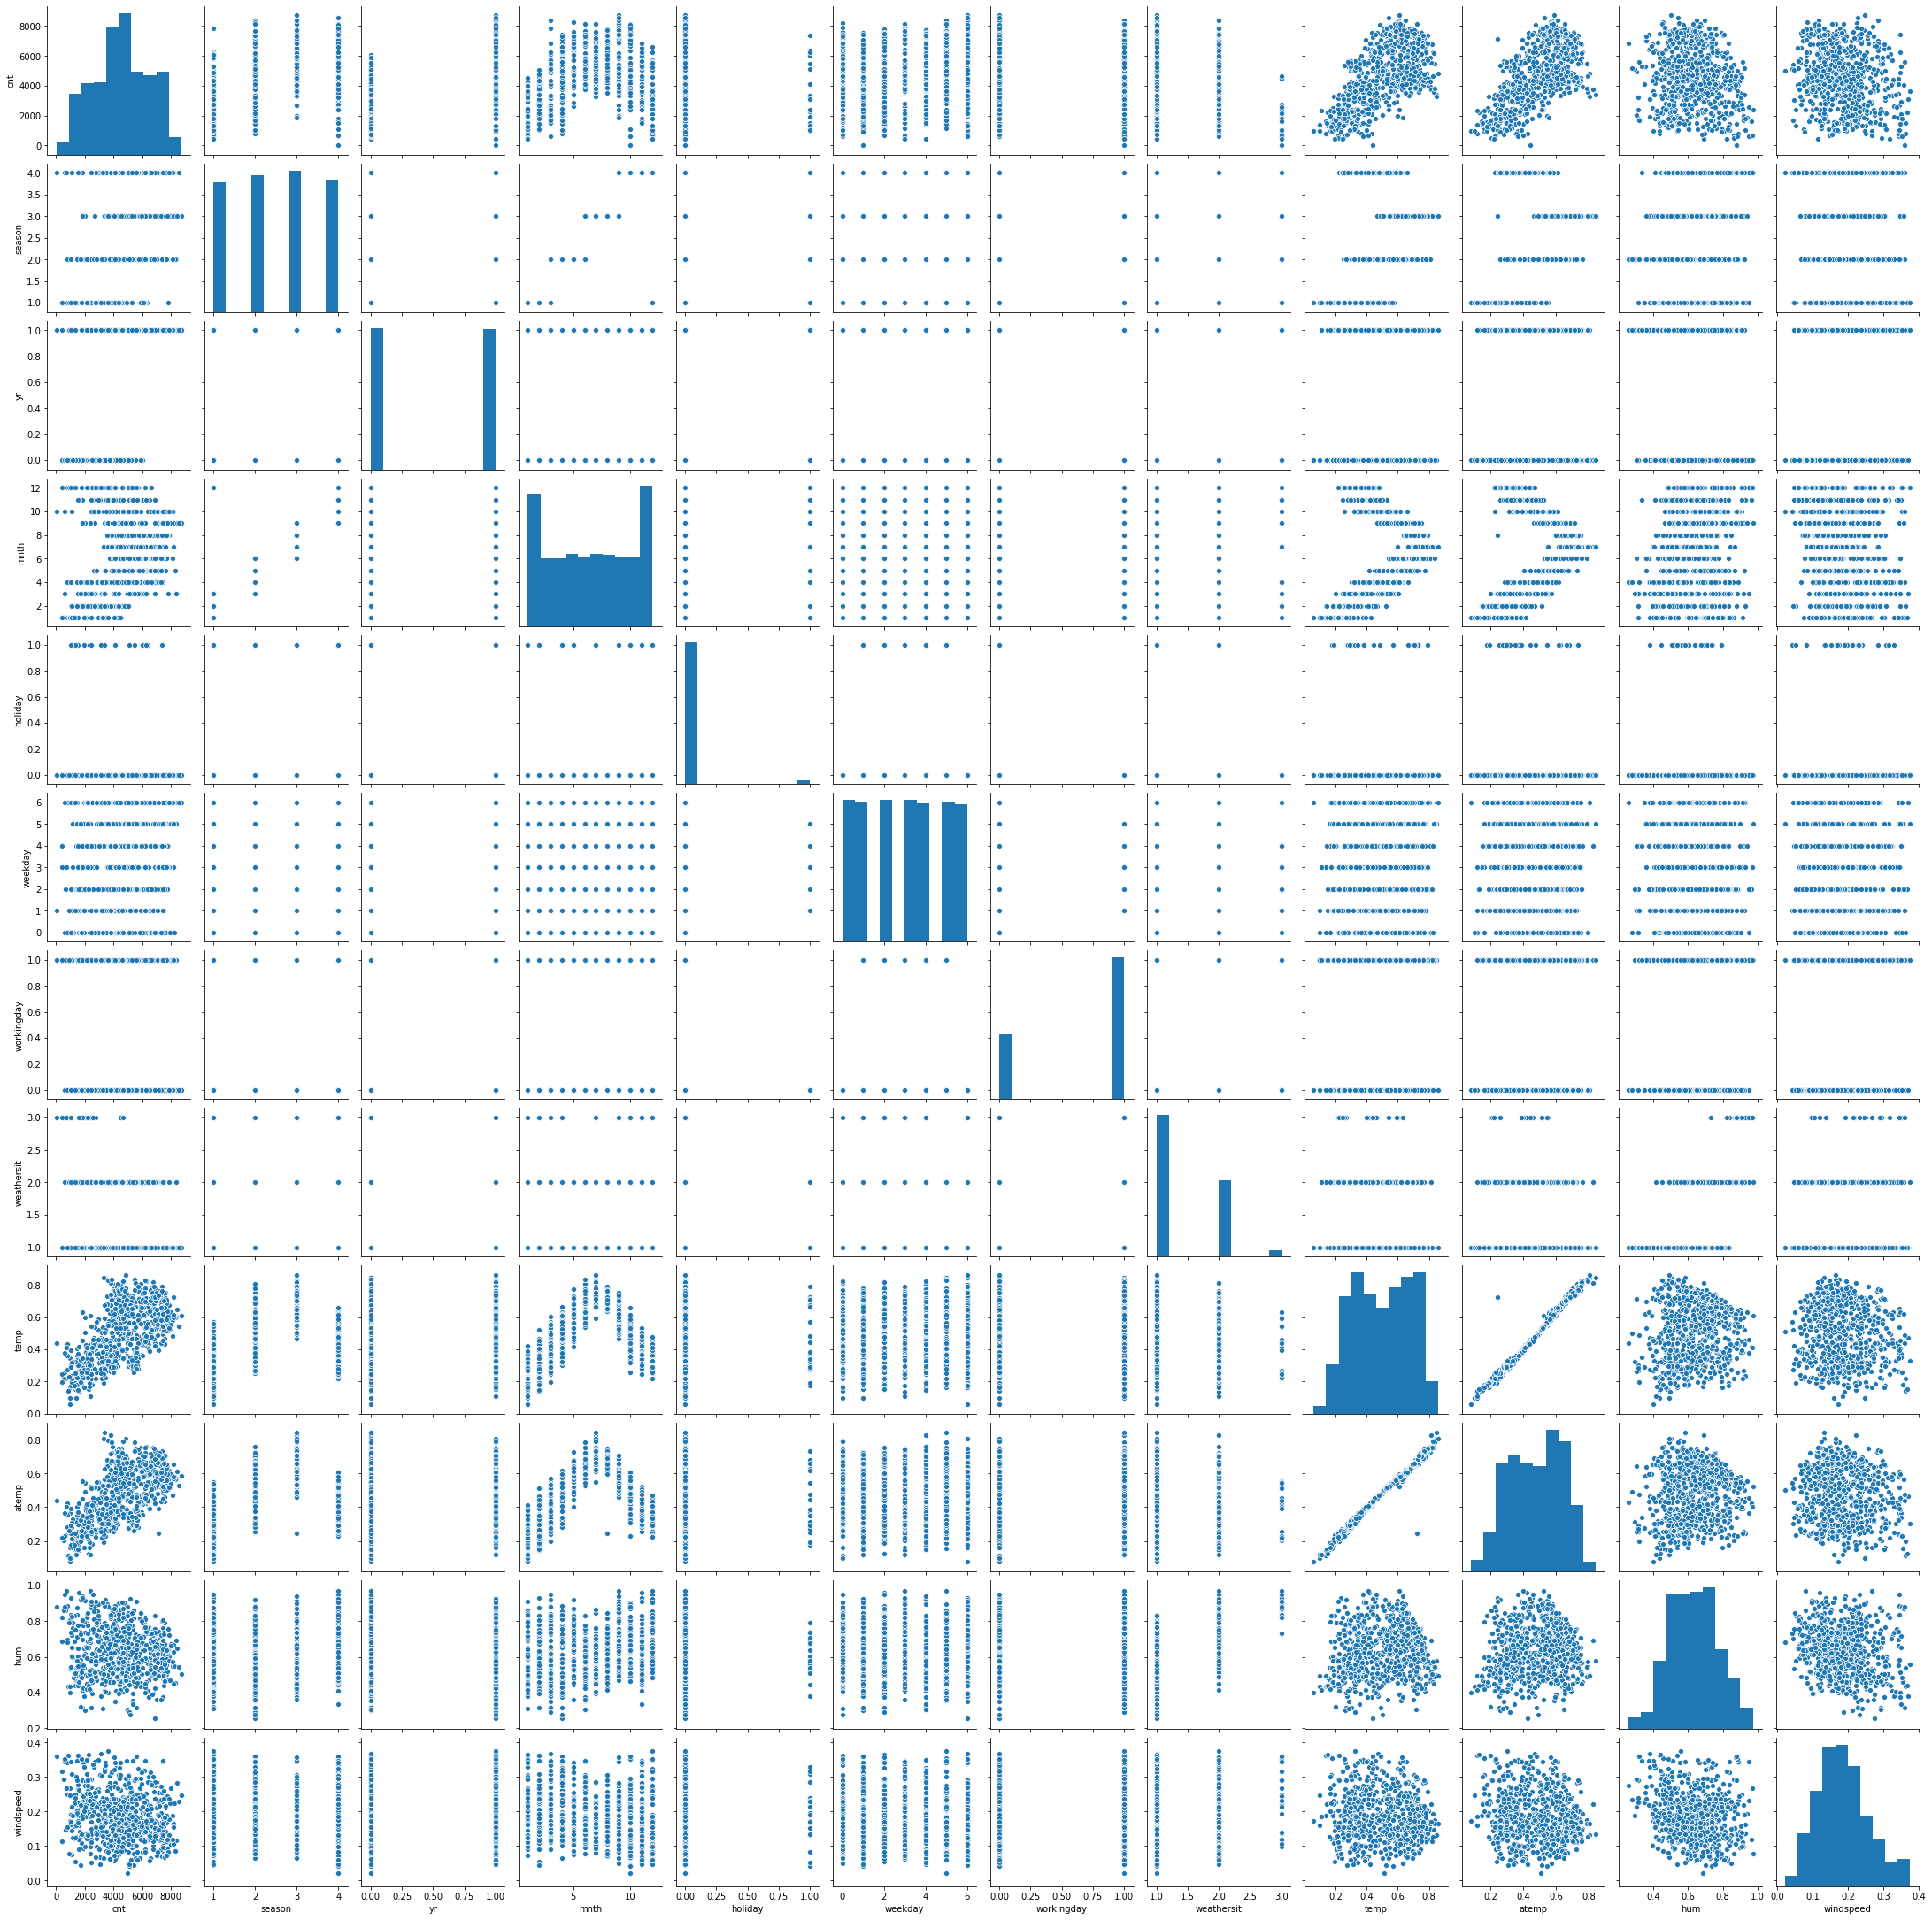

In [449]:
df1 = data1

sns.pairplot(df1) 

In [399]:
data1.quantile

<bound method DataFrame.quantile of       cnt  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0     985       1   0     1        0        6           0           2   
1     801       1   0     1        0        0           0           2   
2    1349       1   0     1        0        1           1           1   
3    1562       1   0     1        0        2           1           1   
4    1600       1   0     1        0        3           1           1   
..    ...     ...  ..   ...      ...      ...         ...         ...   
726  2114       1   1    12        0        4           1           2   
727  3095       1   1    12        0        5           1           2   
728  1341       1   1    12        0        6           0           2   
729  1796       1   1    12        0        0           0           1   
730  2729       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  
0    0.344167  0.363625  0.805833   0.16

# MODEL PREDICTION


In [420]:
from sklearn.preprocessing import StandardScaler 
 

# Initialise the Scaler 
scaler = StandardScaler() 

# To scale data 
t=scaler.fit(data1) 
t

StandardScaler(copy=True, with_mean=True, with_std=True)

In [401]:


from sklearn.model_selection import train_test_split

X = [ data1['season'], data1['yr'], data1['mnth'], data1['holiday'], data1['weekday'],
       data1['workingday'], data1['weathersit'], data1['temp'], data1['atemp'], data1['hum'], data1['windspeed']]

y = [data1['cnt']]
X = np.asarray(X).transpose()
#X.shape
#y.shape
y = np.asarray(y).transpose()

X_train, X_test, y_train, y_test = train_test_split(
    
     X, y, test_size=0.33, random_state=42)

In [402]:
X_test

array([[ 2.       ,  0.       ,  5.       , ...,  0.474117 ,  0.59     ,
         0.228246 ],
       [ 4.       ,  0.       , 12.       , ...,  0.310604 ,  0.612917 ,
         0.0957833],
       [ 1.       ,  0.       ,  2.       , ...,  0.144283 ,  0.494783 ,
         0.188839 ],
       ...,
       [ 4.       ,  1.       , 12.       , ...,  0.390146 ,  0.905417 ,
         0.157975 ],
       [ 2.       ,  1.       ,  4.       , ...,  0.405283 ,  0.454167 ,
         0.249383 ],
       [ 2.       ,  0.       ,  3.       , ...,  0.257574 ,  0.302174 ,
         0.212204 ]])

In [403]:
X_train

array([[ 3.      ,  0.      ,  8.      , ...,  0.654042,  0.415   ,
         0.125621],
       [ 4.      ,  1.      , 11.      , ...,  0.289762,  0.50625 ,
         0.210821],
       [ 3.      ,  1.      ,  7.      , ...,  0.613025,  0.844167,
         0.208967],
       ...,
       [ 4.      ,  0.      , 10.      , ...,  0.472858,  0.71    ,
         0.205854],
       [ 2.      ,  1.      ,  3.      , ...,  0.486733,  0.885417,
         0.192783],
       [ 2.      ,  0.      ,  4.      , ...,  0.503146,  0.5425  ,
         0.163567]])

In [404]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [405]:
y_pred = DecisionTreeRegModel.predict(X_test)


In [406]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))

In [407]:
rms


769.4693334271001

In [409]:
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(np.mean(np.abs((y_test - y_pred) / y_test)) * 1)

1.5925527323253046


In [450]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# train the model using the training sets 
  
# regression coefficients 
#print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
#print('Variance score: {}'.format(reg.score(X_test, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
y_pred_linear = regressor.predict(X_test)
y_pred_linear

array([[3661.30881655],
       [3508.53397447],
       [ 754.48094284],
       [1560.80335215],
       [5232.87777611],
       [4199.49646435],
       [1264.41748687],
       [6584.11689504],
       [1993.95023192],
       [4619.40335749],
       [6719.52018561],
       [2384.66156442],
       [7029.5818763 ],
       [2823.19413525],
       [5560.67422838],
       [4663.7682827 ],
       [4838.70113225],
       [5134.97337378],
       [3236.59142721],
       [5127.98778557],
       [2092.78087178],
       [4692.52777761],
       [4561.5706506 ],
       [6780.43441465],
       [5183.87845152],
       [3021.88182596],
       [4650.96074596],
       [2776.73997974],
       [ 951.58397292],
       [3435.10798398],
       [4331.73674858],
       [2355.05658289],
       [5294.02059777],
       [5045.95349274],
       [2603.27598518],
       [5796.76947492],
       [3305.90644871],
       [6577.93059692],
       [3722.25586278],
       [3711.88408   ],
       [3108.25989882],
       [5976.691

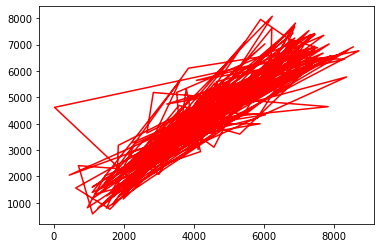

In [452]:
plt.plot(y_test, y_pred_linear, color='red') 
plt.show() 

In [453]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred_linear))

In [454]:
type(X)

numpy.ndarray

In [455]:
rms

863.71362891885

In [456]:
#mape
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(np.mean(np.abs((y_test - y_pred) / y_test)) * 1)

1.5565516497955458


In [457]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

/Users/chandan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([4397.32, 3468.74, 1457.55, 2373.95, 4686.8 , 4384.29, 1797.66,
       7282.1 , 1887.61, 4347.34, 7601.06, 2379.89, 6630.96, 2156.08,
       4428.77, 4479.52, 5144.09, 4840.87, 2715.48, 5024.54, 1552.91,
       4468.2 , 4310.27, 7074.47, 4615.07, 4009.48, 4319.93, 2550.67,
       1572.25, 2996.95, 4145.16, 2441.2 , 5374.29, 5911.11, 2176.63,
       6060.33, 3130.85, 6923.56, 4531.89, 3549.73, 4204.1 , 5499.45,
       7864.96, 4457.72, 5048.09, 1615.82, 2126.4 , 2164.03, 4190.84,
       5577.59, 3825.51, 4803.58, 6939.3 , 3178.61, 1639.18, 7520.83,
       1739.9 , 4386.74, 6402.34, 6201.51,  869.65, 6381.77, 1805.13,
       4546.56, 4616.96, 6158.62, 6293.78, 3779.87, 6983.03, 5256.05,
       2973.82, 4743.26, 7470.82, 3399.1 , 3500.55, 7567.16, 4705.09,
       7069.58, 4636.42, 6860.04, 5899.16, 7161.61, 1254.01, 7463.79,
       5977.65, 3496.3 , 4985.86, 3632.62, 6547.01, 1645.69, 5199.56,
       6869.07, 3532.63, 3662.99, 2460.02, 1484.53, 4787.7 , 7840.11,
       3426.3 , 2659

In [458]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

640.1102640385814

numpy.ndarray

TypeError: 'numpy.float64' object is not callable